In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy.optimize as optimization
from specs import *



In [2]:
dir1= "/Users/jiyong/data/spectrum_analyzer_202507/v03"

csv1 = dir1+"/results/20241016_182839_spec.txt"

spec_bkg1 = dir1+"/isotope_data/kwangyang_20241016/PN1_sn1174_HV1500_Gain-4.0_20s_BKG.mca"
spec_am1 = dir1+"/isotope_data/kwangyang_20241016/PN1_sn1174_HV1500_Gain-4.0_20s_Am241(90uCi)-100cm.mca"
spec_co1 = dir1+"/isotope_data/kwangyang_20241016/PN1_sn1174_HV1500_Gain-4.0_20s_Co60(9uCi)-100cm.mca"
spec_cs1 = dir1+"/isotope_data/kwangyang_20241016/PN1_sn1174_HV1500_Gain-4.0_20s_Cs137(16uCi)-100cm.mca"

spec_bkg2 = dir1+"/isotope_data/kwangyang_20241016/PN2_sn1215_HV1425_Gain-4.0_20s_BKG.mca"
spec_am2 = dir1+"/isotope_data/kwangyang_20241016/PN2_sn1215_HV1425_Gain-4.0_20s_Am241(90uCi)-100cm.mca"
spec_co2 = dir1+"/isotope_data/kwangyang_20241016/PN2_sn1215_HV1425_Gain-4.0_20s_Co60(9uCi)-100cm.mca"
spec_cs2 = dir1+"/isotope_data/kwangyang_20241016/PN2_sn1215_HV1425_Gain-4.0_20s_Cs137(16uCi)-100cm.mca"

cpspath = dir1+"/results/20241016_182839_cps.txt"


In [3]:
refspec1 = pd.DataFrame({
    "Bkg": read_mca(spec_bkg1),
    "Am241": read_mca(spec_am1),
    "Co60": read_mca(spec_co1),
    "Cs137": read_mca(spec_cs1)
})
refspec2= pd.DataFrame({
    "Bkg": read_mca(spec_bkg2),
    "Am241": read_mca(spec_am2),
    "Co60": read_mca(spec_co2),
    "Cs137": read_mca(spec_cs2)
    
})

Text(0.5, 1.0, 'Raw Spectrum Panel 2')

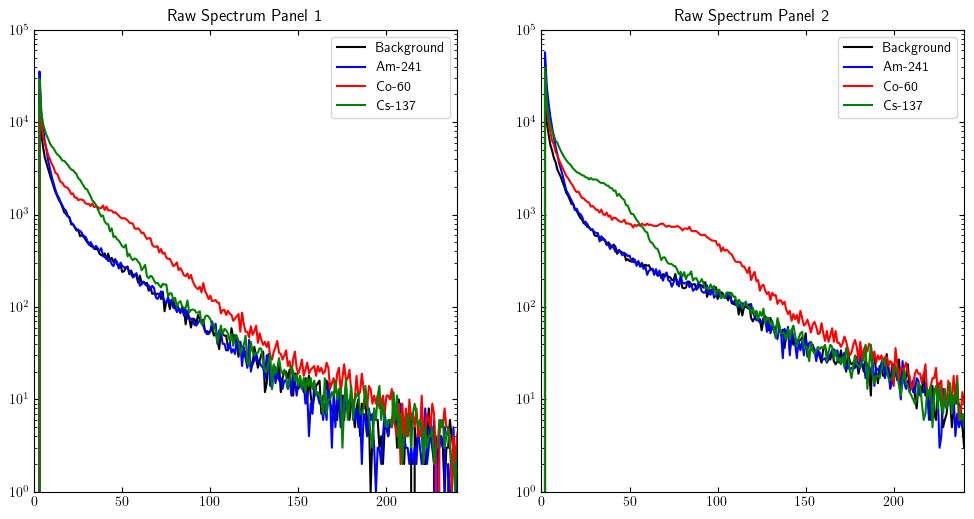

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(refspec1["Bkg"], label="Background", color="black")
plt.plot(refspec1["Am241"], label="Am-241", color="blue")
plt.plot(refspec1["Co60"], label="Co-60", color="red")
plt.plot(refspec1["Cs137"], label="Cs-137", color="green")
plt.yscale("log", base=10)
plt.ylim(1.0, 1e5)
plt.xlim(0, 240)
plt.legend()
plt.title("Raw Spectrum Panel 1")
plt.subplot(1,2,2)
plt.plot(refspec2["Bkg"], label="Background", color="black")
plt.plot(refspec2["Am241"], label="Am-241", color = "blue")
plt.plot(refspec2["Co60"], label="Co-60", color="red")
plt.plot(refspec2["Cs137"], label="Cs-137", color = "green")
plt.yscale("log", base=10)
plt.ylim(1.0, 1e5)
plt.xlim(0, 240)
plt.legend()
plt.title("Raw Spectrum Panel 2")

Text(0.5, 1.0, 'Raw Spectrum Panel 2')

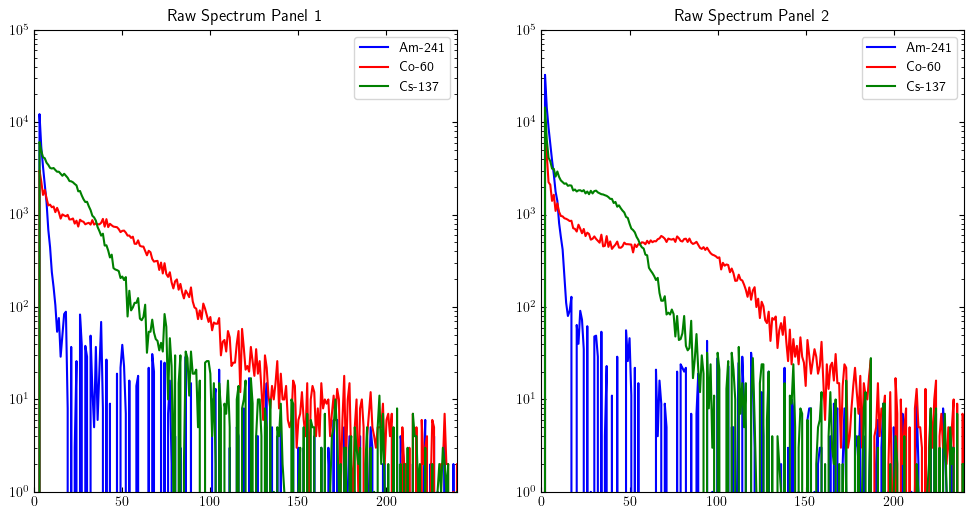

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(refspec1["Am241"] - refspec1["Bkg"], label="Am-241", color="blue")
plt.plot(refspec1["Co60"]- refspec1["Bkg"], label="Co-60", color="red")
plt.plot(refspec1["Cs137"]- refspec1["Bkg"], label="Cs-137", color="green")
plt.yscale("log", base=10)
plt.ylim(1.0, 1e5)
plt.xlim(0, 240)
plt.legend()
plt.title("Raw Spectrum Panel 1")
plt.subplot(1,2,2)
plt.plot(refspec2["Am241"]- refspec2["Bkg"], label="Am-241", color = "blue")
plt.plot(refspec2["Co60"]- refspec2["Bkg"], label="Co-60", color="red")
plt.plot(refspec2["Cs137"]- refspec2["Bkg"], label="Cs-137", color = "green")
plt.yscale("log", base=10)
plt.ylim(1.0, 1e5)
plt.xlim(0, 240)
plt.legend()
plt.title("Raw Spectrum Panel 2")

Text(0.5, 1.0, 'Background Substracted BCCS Spectrum Panel 2')

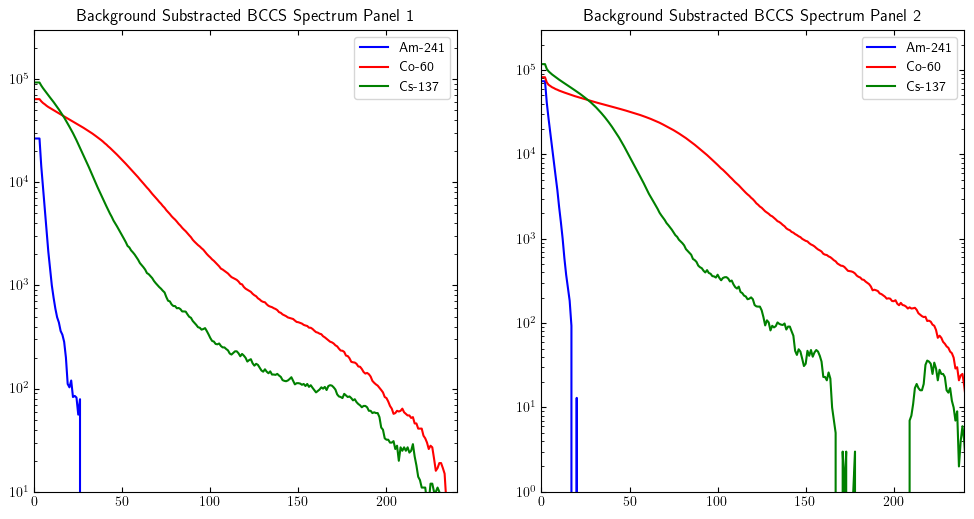

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(bccs(refspec1["Am241"]) -bccs(refspec1["Bkg"]) , label="Am-241", color = "blue")
plt.plot(bccs(refspec1["Co60"]) -bccs(refspec1["Bkg"]), label="Co-60", color="red")
plt.plot(bccs(refspec1["Cs137"]) -bccs(refspec1["Bkg"]), label="Cs-137", color = "green")
plt.yscale("log", base=10)
plt.ylim(10.0, 3e5)
plt.xlim(0, 240)
plt.legend()
plt.title("Background Substracted BCCS Spectrum Panel 1")
plt.subplot(1,2,2)
plt.plot(bccs(refspec2["Am241"]) - bccs(refspec2["Bkg"]), label="Am-241", color = "blue")
plt.plot(bccs(refspec2["Co60"])- bccs(refspec2["Bkg"]), label="Co-60", color = "red")
plt.plot(bccs(refspec2["Cs137"])- bccs(refspec2["Bkg"]), label="Cs-137", color = "green")
plt.yscale("log", base=10)
plt.ylim(1, 3e5)
plt.xlim(0, 240)
plt.legend()
plt.title("Background Substracted BCCS Spectrum Panel 2")

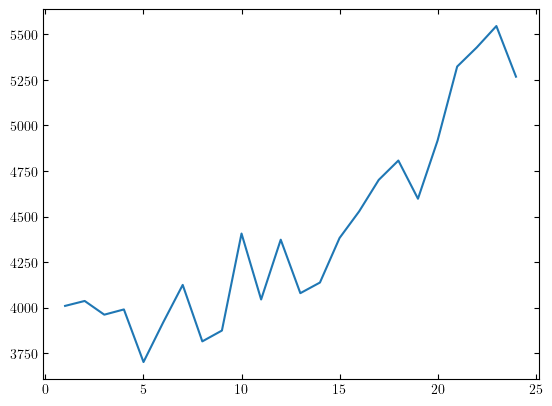

In [ ]:
data = pd.read_csv(csv1, sep = ","+" ", skiprows=9, engine='python')
cps = pd.read_csv(cpspath, sep = ","+" ", skiprows=2, engine='python', header=None, names=["MainGamma", "SubGamma", "MainNeutron", "SubNeutron"])
plt.plot(cps["MainGamma"])

(0.0, 240.0)

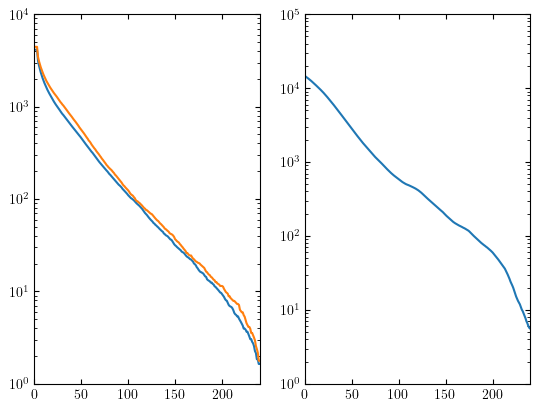

In [8]:
plt.subplot(1, 2, 1)
plt.plot(data["MainBkg"])
plt.plot(data["Main"])
plt.yscale("log", base=10)
plt.ylim(1.0, 1.0e4)
plt.xlim(0, 240)

plt.subplot(1, 2, 2)
plt.plot(bccs(data["Main"]) - bccs(data["MainBkg"]))
plt.yscale("log", base=10)
plt.ylim(1.0, 1.0e5)
plt.xlim(0, 240)

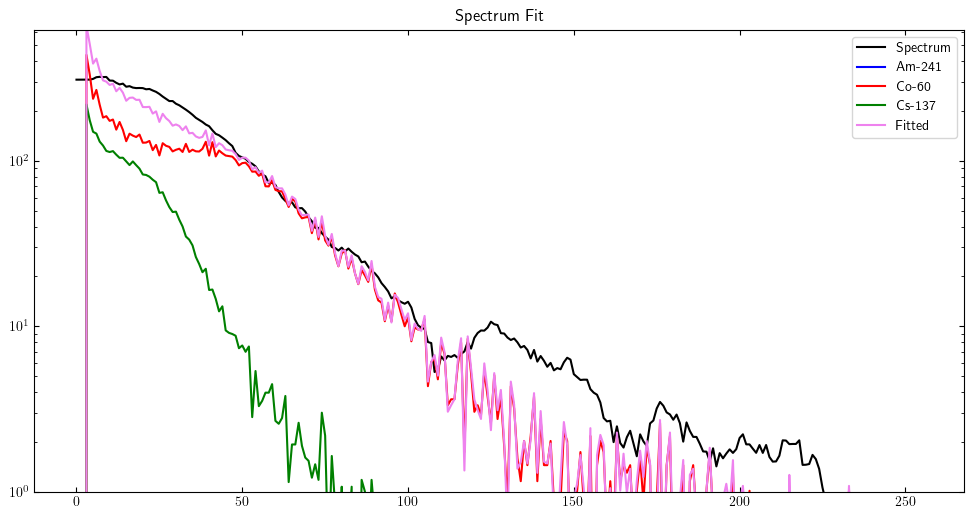

array([4.52084861e-10, 1.44951146e-01, 3.57960200e-02])

In [9]:
specfit((0.5, 0.5, 0.5), data["Main"]-data["MainBkg"], refspec1, i0=3, plot=True)

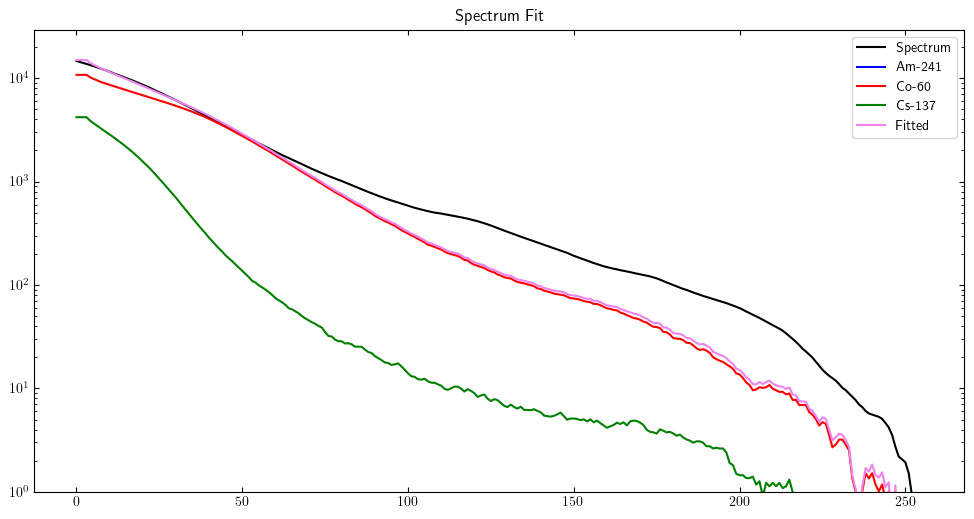

array([-5.90959092e-09,  1.68433355e-01,  4.52553797e-02])

In [10]:
bccsfit((0.5, 0.5, 0.5), bccs(data["Main"]-data["MainBkg"]), refspec1, i0=3, plot=True)

In [1]:
np.nan

NameError: name 'np' is not defined